In [1]:
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
import numpy as np #importing numpy
%matplotlib inline

In [2]:
polInc = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b") #Importing data of police incidents in the last 30 days
polInc.drop(["PK", "INCIDENTZONE", "CCR"], axis = 1) #dropping the columns that is police specific such as incident ID
polIncDF = pd.DataFrame(polInc) #Making the dataframe
polIncDF = polIncDF.groupby("INCIDENTNEIGHBORHOOD").count()
polIncDF.drop(["Outside City", "Outside County"], inplace = True) #Dropping outside city and outside county

In [3]:
polIncDF2 = pd.DataFrame(polInc) #Making the second dataframe for another standard
polIncDF2 = polIncDF2.groupby("INCIDENTNEIGHBORHOOD")["HIERARCHY"].max() #Finding out the most sever crime based on UCR Hierarchy, but this converts the dataframe to a series
polIncDF2 = pd.DataFrame(polIncDF2) #Turning the series back into a dataframe
polIncDF2.drop(["Outside City", "Outside County"], inplace = True) #Dropping outside city and outside county

In [4]:
polIncDFFin = pd.merge(polIncDF.sort_values(by = "OFFENSES"), polIncDF2.sort_values(by = "HIERARCHY"), on = ["INCIDENTNEIGHBORHOOD"]) #Merge
polIncDFFin.drop(polIncDFFin.columns.difference(["HIERARCHY_y", "INCIDENTNEIGHBORHOOD", "OFFENSES"]), 1, inplace = True) #Removing all columns except the ones we want
polIncDFFin.rename(columns = {"INCIDENTNEIGHBORHOOD":"Neighborhoods", "HIERARCHY_y":"Hierarchy", "OFFENSES":"Number of Incidents"}, inplace = True) #Changeing column names for presentation

In [5]:
pf = pd.read_csv("https://data.wprdc.org/datastore/dump/fbb50b02-2879-47cd-abea-ae697ec05170")

In [6]:
publicFac = pd.DataFrame(pf) #Making the dataframe for public facilities
publicFac = publicFac.groupby("neighborhood").count()
publicFac.drop(publicFac.columns.difference(["inactive", "neighborhood"]), 1, inplace = True) #dropping irrelevant columns

In [7]:
preMerged = pd.merge(polIncDFFin, publicFac.sort_values(by = "inactive", ascending = False), left_index = True, right_index = True) #Merging and telling pandas to merge by index as well as sorting
preMerged.head() #top five values

,Number of Incidents,Hierarchy,inactive
Regent Square,1,0,4
Swisshelm Park,2,99,1
Glen Hazel,3,99,1
Hays,4,99,2
Allegheny West,8,27,3


In [8]:
fire_DS = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")

In [9]:
fire_DF = pd.DataFrame(fire_DS) #fire alarm dataframe
fire_DF = fire_DF.groupby("neighborhood").count() 
fire_DF.drop(fire_DF.columns.difference(["neighborhood", "alarms"]), 1, inplace = True) #dropping irrelevant columns again
fire_DF.head()

,alarms
neighborhood,
Allegheny Center,50
Allegheny West,34
Allentown,99
Arlington,40
Arlington Heights,12


In [10]:
finalMerged = pd.merge(preMerged, fire_DF, left_index = True, right_index = True) #final merge
finalMerged = pd.DataFrame(finalMerged)

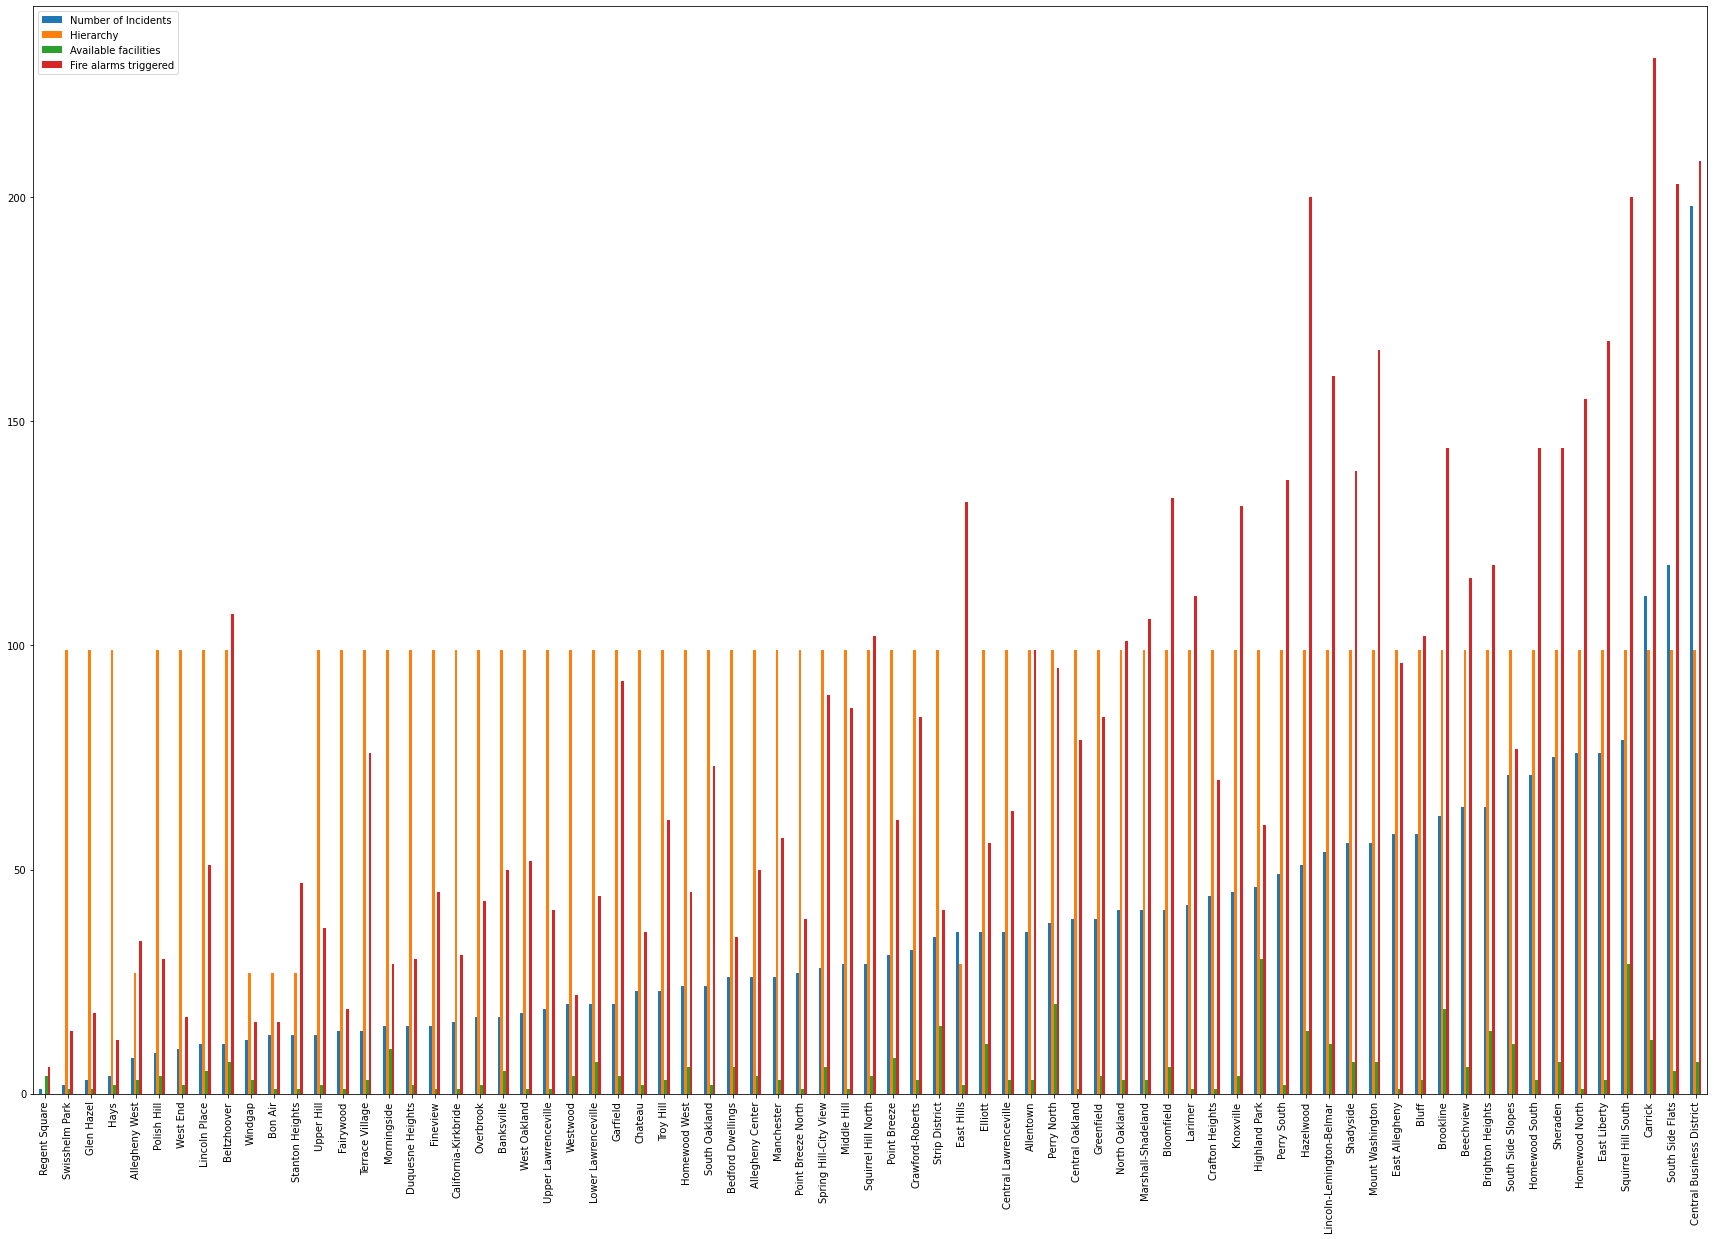

In [11]:
finalMerged.rename(columns = {"inactive":"Available facilities", "alarms":"Fire alarms triggered"}, inplace = True) #replacing names for presentation
finalMerged.sort_values(by = ["Number of Incidents", "Hierarchy", "Fire alarms triggered"]).plot(kind = "bar", figsize = (30, 20)) #make sure all values are sorted


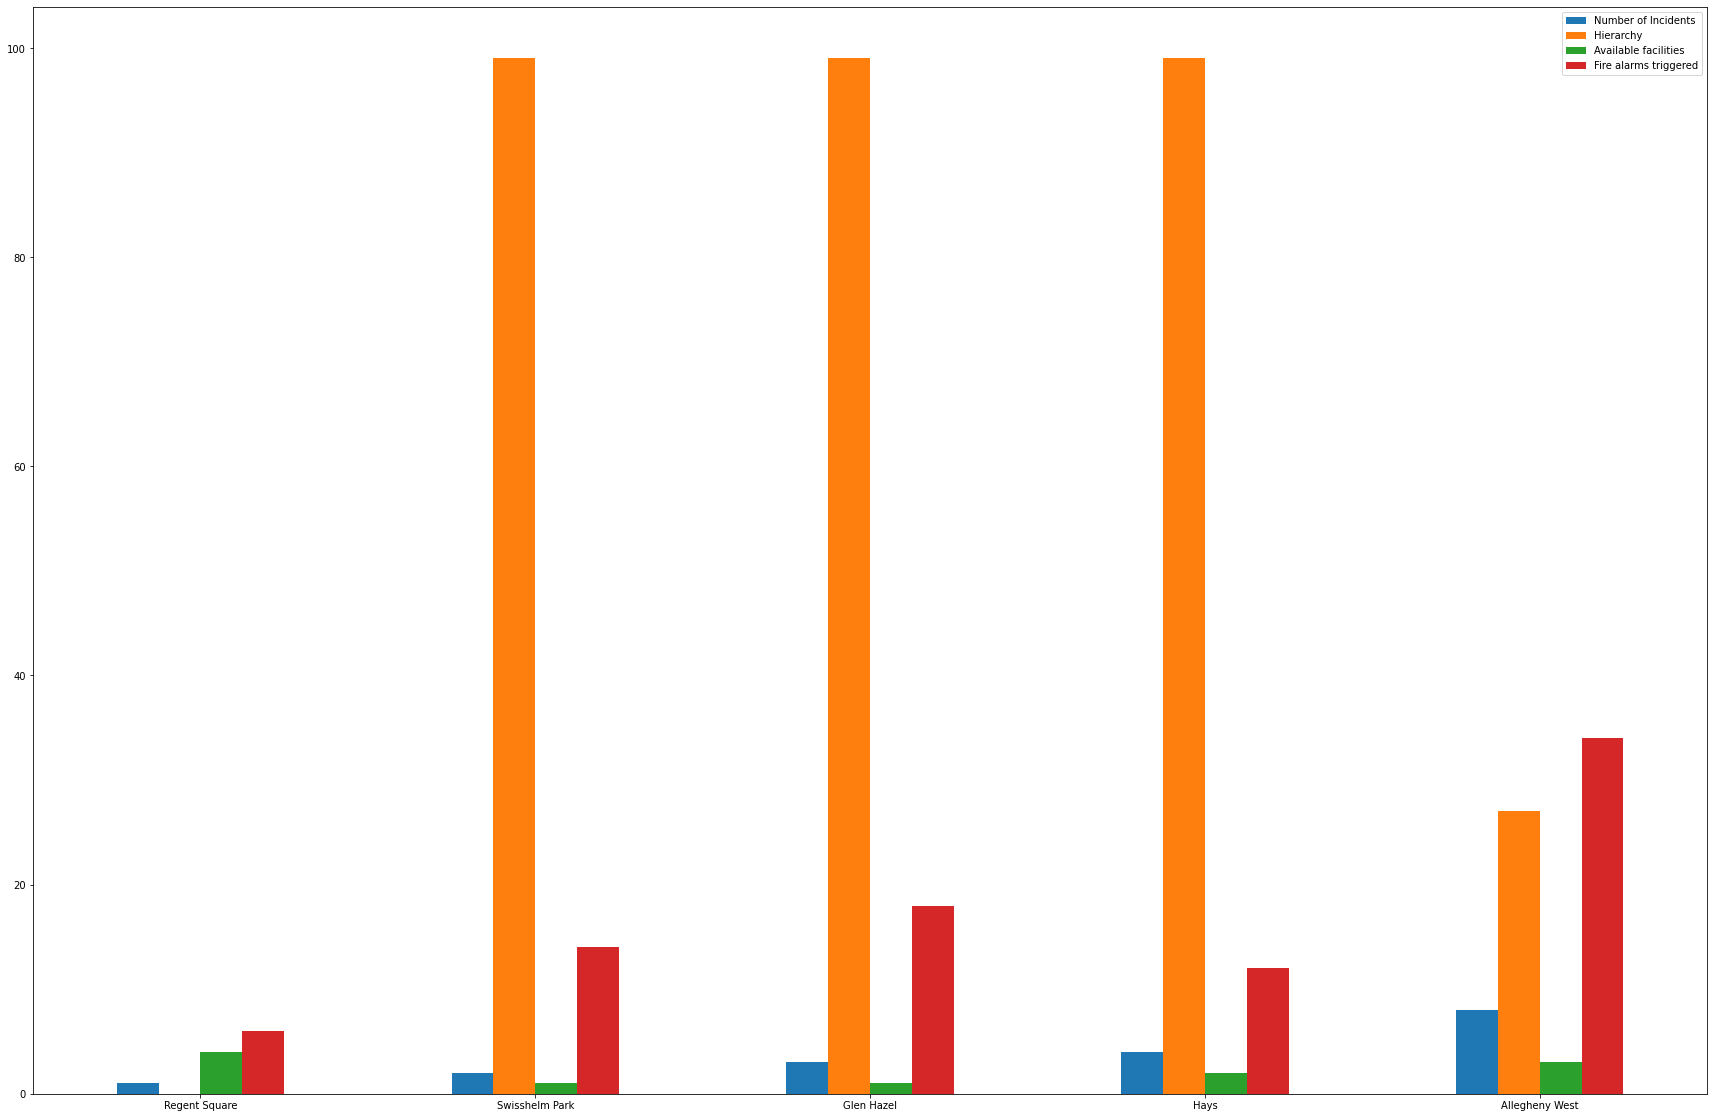

In [12]:
finalMerged.sort_values(by = ["Number of Incidents", "Hierarchy", "Fire alarms triggered"]).head().plot(kind = "bar", figsize = (30, 20), rot = 0) #displaying top five
plt.style.use("seaborn") #adding style

In [18]:
finalMerged.head() #Final Results, do note that a higher values of available facilities is better

,Number of Incidents,Hierarchy,Available facilities,Fire alarms triggered
Regent Square,1,0,4,6
Swisshelm Park,2,99,1,14
Glen Hazel,3,99,1,18
Hays,4,99,2,12
Allegheny West,8,27,3,34
